<a href="https://colab.research.google.com/github/swan-shin/Rasberry_Pi/blob/master/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
len(train_labels)

(60000, 28, 28)


60000

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
len(test_labels)

10000

In [7]:
# 신경망 구조
from keras import models
from keras import layers

In [8]:
# 데이터 처리 필터(층)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
# 컴파일 단계
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
               metrics=['accuracy'])

In [10]:
# 이미지 데이터 준비
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [11]:
# 레이블 준비
from tensorflow.keras.utils import to_categorical
#keras.utils --> 설치해야됨 --> tensorflow.keras.utils

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# 신경망 훈련 fit method 호출 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 5ms/step - loss: 0.2547 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1046 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9887


loss 네트워크 손실, accuracy 정확도

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0627 - accuracy: 0.9815


훈련 정확도와 테스트 정확도 사이의 차이는 overfiting 때문

2-2 신경망을 위한 데이터 표현

텐서(tensor: 다차원 넘파이 배열)에 데이터를 저장

--> 데이터를 위한 container(임의의 차원 개수를 가지는 행렬의 일반화된 모습)

텐서에서는 차원(dimension)을 종종 축(axis)이라고 부름

하나의 숫자만 담고있는 텐서를 스칼라(scalar) 넘파이에서는 float32나 float64 타입의 숫자가 스칼라 텐서

In [16]:
import numpy as np

In [17]:
x = np.array(12)

In [21]:
x

array(12)

In [20]:
x.ndim

0

벡터(1D 텐서): 숫자의 배열을 벡터 또는 1D 텐서라고 부름.
1D 텐서는 딱 하나의 축을 가짐. 넘파이에서 벡터를 나타내면 다음과 같음.

In [22]:
x = np.array([12, 3, 6, 14, 7]) # 5차원 벡터
# 5D 벡터: 하나의 축을 따라 5개의 차원을 가진 것
# 5D 텐서: 5개의 축을 가진 것

In [23]:
x

array([12,  3,  6, 14,  7])

In [24]:
x.ndim

1

벡터(2D 텐서): 행렬 -> 2개의 축(행, 열)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 12, 33, 254 ,80],
              [7, 32, 10, 11, 4]])
# x의 1행 = [5, 78, 2, 34, 0]
# x의 1열 = [5, 6, 7]

3D 텐서와 고차원 텐서

In [25]:
x = np.array([[[5, 2, 3],
              [4, 12, 45]],
              [[15, 8, 73],
              [16, 11, 82]]])

In [26]:
x.ndim

3

축의 개수(랭크): 3D 텐서에는 3개의 축, 행렬에는 2개의 축(numpy 라이브러리 ndim 속성에 저장)

In [29]:
x.dtype

dtype('int64')

In [30]:
digit = train_images[4]

In [31]:
import matplotlib.pyplot as plt

TypeError: ignored

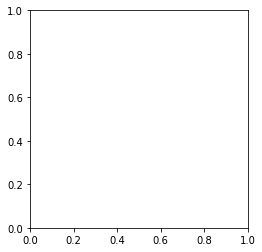

In [34]:
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()